# Recipe classification `14 points`

Source: `recipes.csv`, which I scraped from... somewhere. Each row represents a recipe.

**Topics**

* Filtering
* Text analysis
* Classification

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 20)

df = pd.read_csv('recipes.csv')
df.head()

/Users/Jonas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles"
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil"
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers"
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam ma..."


## Filtering and aggregating `3 points`

### What is the most common cuisine in this dataset?

In [2]:
df['cuisine'].value_counts(normalize = False).head()

italian        7838
mexican        6438
southern_us    4320
indian         3003
chinese        2673
Name: cuisine, dtype: int64

### Plot a bar graph of cuisine popularity, with the most common at the top

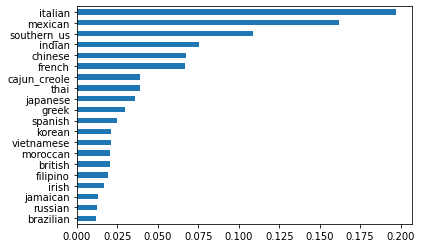

In [3]:
plot1 = df['cuisine'].value_counts(normalize = True, ascending = True).plot(kind = 'barh')

### Clean up the names so we get nicer graphics

"southern_us" should be "Southern US," "russian" should be "Russian," etc.

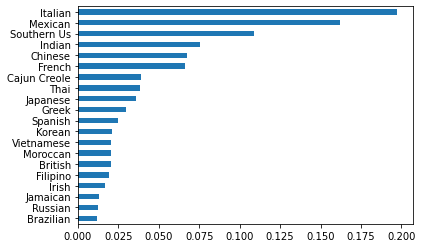

In [4]:
# Replacing the "_"
df.loc[df['cuisine'].str.contains('southern_us', na=False),'cuisine'] = 'Southern US'
df.loc[df['cuisine'].str.contains('cajun_creole', na=False),'cuisine'] = 'Cajun Creole'

# Items to title case
df['cuisine']= df['cuisine'].str.title()

plot1 = df['cuisine'].value_counts(normalize = True, ascending = True).plot(kind = 'barh')

## Text analysis

### Build a classifier to predict whether a recipe is Greek or not `2 points`

In [5]:
# Add a new column to the Dataframe that tells with 1 and 0 if a dish is greek or not
df['polarity_greek'] = 0
df.loc[df['cuisine'].str.contains('Greek', na=False),'polarity_greek'] = 1
df.head()

,cuisine,id,ingredient_list,polarity_greek
0,Greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles",1
1,Southern Us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil",0
2,Filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers",0
3,Indian,22213,"water, vegetable oil, wheat, salt",0
4,Indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam ma...",0


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Build a vectorizer for the ingredients
vectorizer = TfidfVectorizer(stop_words = 'english')
vectors = vectorizer.fit_transform(df.ingredient_list)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

/Users/Jonas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,14,15,25,33,40,43,95,96,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,ackee,acorn,acting,activ,active,added,adobo,adzuki,agar,agave,age,aged,ahi,aioli,ajinomoto,ajwain,aka,alaskan,albacore,alcohol,ale,aleppo,alexia,alfalfa,alfredo,allspice,almond,almondmilk,almonds,aloe,alphabet,alum,amaranth,amarena,amaretti,amaretto,amba,amber,amberjack,amchur,america,american,aminos,ammonium,amontillado,ampalaya,anaheim,anasazi,ancho,anchovies,anchovy,andouille,anejo,angel,anglaise,angled,angostura,angus,anise,anisette,anjou,annatto,aonori,apple,apples,applesauce,applewood,apricot,apricots,aquavit,arak,arame,arbol,arborio,arctic,arepa,argo,arhar,armagnac,...,virgin,virginia,vital,vitamin,vodka,wafer,wafers,waffle,wagon,wakame,walnut,walnuts,warm,wasabe,wasabi,water,watercress,watermelon,wax,waxy,wedge,wedges,weed,wensleydale,wesson,wheat,wheatberries,wheel,wheels,whey,whip,whipped,whipping,whiskey,whisky,white,whitefish,whites,wholemeal,wholesome,wide,wieners,wild,wildflower,williams,wine,winesap,wing,wingettes,wings,winter,wish,wok,woksaus,wolf,wolfberries,won,wondra,wonton,wood,woods,worcestershire,world,wrappers,wraps,xanthan,xuxu,yaki,yakisoba,yam,yams,yardlong,yeast,yellow,yellowfin,yellowtail,yoghurt,yogurt,yolk,yolks,yoplait,york,young,yu,yuca,yucca,yukon,yum,yuzu,yuzukosho,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274719,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221450,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [8]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X = words_df
Y = df.polarity_greek

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# clf = LogisticRegression(C=1e9, solver='lbfgs', max_iter=4000)
# clf = RandomForestClassifier(n_estimators=50)
clf = LinearSVC()
# clf = MultinomialNB()
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

CPU times: user 910 ms, sys: 304 ms, total: 1.21 s
Wall time: 1.22 s


0.9871279163314561

### Using a confusion matrix, show how well it classifies Greek recipes `1 point`

It won't be perfect, but it shouldn't be *completely awful*.

In [9]:
from sklearn.metrics import confusion_matrix

Y_true = Y_test
Y_pred = clf.predict(X_test)
matrix = confusion_matrix(Y_true, Y_pred)

label_names = pd.Series(['not_greek', 'greek'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Recipe is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted not_greek,Predicted greek
Recipe is not_greek,0.996789,0.003211
Recipe is greek,0.334483,0.665517


### List the top 20 ingredients that predict a recipe to be greek or a recipe to be not greek `2 points`

In [10]:
import eli5

eli5.show_weights(clf, top=(20, 20), feature_names=vectorizer.get_feature_names())

/Users/Jonas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+3.663,feta
+2.961,greek
+2.715,phyllo
+2.684,ouzo
+2.377,tahini
+2.135,kefalotyri
+2.066,tzatziki
+1.997,oregano
+1.905,lamb
+1.860,bulgur


## Create, evaluate, and examine the weights of a Mexican food classifier `3 points`

In [11]:
# Add a new column to the Dataframe that tells with 1 and 0 if a dish is mexican or not
df['polarity_mexican'] = 0
df.loc[df['cuisine'].str.contains('Mexican', na=False),'polarity_mexican'] = 1

# Setting up the features and labels
X = words_df
Y = df.polarity_mexican

#Doing the test-train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#Classifiing
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.9731496379726469

In [12]:
eli5.show_weights(clf, top=(10, 10), feature_names=vectorizer.get_feature_names())

/Users/Jonas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+4.443,tortillas
+3.636,taco
+3.442,tortilla
+3.251,tequila
+3.216,mexican
+2.925,enchilada
+2.510,salsa
+2.426,masa
+2.387,achiote
+2.380,jicama


## Multi-class classification `3 points`

### Encode the recipe names as numbers

Let's convert each label - greek, southern US, indian, etc - to be a number. You can have this code:

```py
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['cuisine_label'] = le.fit_transform(df.cuisine)
df.head()
```

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['cuisine_label'] = le.fit_transform(df.cuisine)
df.head()

,cuisine,id,ingredient_list,polarity_greek,polarity_mexican,cuisine_label
0,Greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles",1,0,6
1,Southern Us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil",0,0,16
2,Filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers",0,0,4
3,Indian,22213,"water, vegetable oil, wheat, salt",0,0,7
4,Indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam ma...",0,0,7


### Build a classifier to predict this new `cuisine_label` column

In [14]:
# Setting up the features and labels
X = words_df
Y = df.cuisine_label

#Doing the test-train split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

#Classifiing
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7867055510860821

### Using a confusion matrix, see what cuisines it confuses

Here's the multi-class version:

```py
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(le.classes_)
scores = pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)
scores.style.background_gradient(cmap='YlGnBu')
```

In [15]:
from sklearn.metrics import confusion_matrix

Y_true = Y_test
Y_pred = clf.predict(X_test)
matrix = confusion_matrix(Y_true, Y_pred)

label_names = pd.Series(le.classes_)
scores = pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)
scores.style.background_gradient(cmap='YlGnBu')

,Predicted Brazilian,Predicted British,Predicted Cajun Creole,Predicted Chinese,Predicted Filipino,Predicted French,Predicted Greek,Predicted Indian,Predicted Irish,Predicted Italian,Predicted Jamaican,Predicted Japanese,Predicted Korean,Predicted Mexican,Predicted Moroccan,Predicted Russian,Predicted Southern Us,Predicted Spanish,Predicted Thai,Predicted Vietnamese
Is Brazilian,0.585586,0.000000,0.000000,0.018018,0.027027,0.027027,0.000000,0.000000,0.009009,0.036036,0.018018,0.000000,0.000000,0.153153,0.000000,0.000000,0.072072,0.036036,0.009009,0.009009
Is British,0.000000,0.360731,0.022831,0.004566,0.009132,0.141553,0.009132,0.018265,0.082192,0.073059,0.018265,0.013699,0.000000,0.018265,0.000000,0.031963,0.191781,0.000000,0.004566,0.000000
Is Cajun Creole,0.000000,0.002584,0.715762,0.005168,0.000000,0.033592,0.000000,0.000000,0.002584,0.043928,0.000000,0.000000,0.002584,0.033592,0.002584,0.000000,0.147287,0.010336,0.000000,0.000000
Is Chinese,0.002937,0.001468,0.001468,0.857562,0.010279,0.004405,0.002937,0.001468,0.000000,0.014684,0.002937,0.016153,0.033774,0.001468,0.001468,0.002937,0.014684,0.001468,0.016153,0.011747
Is Filipino,0.010811,0.010811,0.010811,0.108108,0.589189,0.032432,0.000000,0.005405,0.000000,0.021622,0.000000,0.021622,0.005405,0.059459,0.000000,0.000000,0.070270,0.000000,0.037838,0.016216
Is French,0.001515,0.012121,0.009091,0.006061,0.000000,0.650000,0.013636,0.010606,0.015152,0.174242,0.000000,0.006061,0.001515,0.006061,0.006061,0.007576,0.062121,0.018182,0.000000,0.000000
Is Greek,0.000000,0.003623,0.000000,0.000000,0.003623,0.032609,0.750000,0.018116,0.003623,0.126812,0.003623,0.007246,0.000000,0.010870,0.014493,0.000000,0.021739,0.003623,0.000000,0.000000
Is Indian,0.000000,0.001318,0.001318,0.003953,0.005270,0.013175,0.006588,0.868248,0.003953,0.010540,0.005270,0.002635,0.001318,0.026350,0.023715,0.000000,0.013175,0.000000,0.013175,0.000000
Is Irish,0.000000,0.090395,0.005650,0.016949,0.005650,0.163842,0.005650,0.005650,0.406780,0.045198,0.000000,0.005650,0.000000,0.011299,0.011299,0.028249,0.192090,0.005650,0.000000,0.000000
Is Italian,0.000000,0.003610,0.002579,0.000000,0.000516,0.035585,0.012378,0.003094,0.001547,0.895823,0.001031,0.000000,0.000000,0.007220,0.002063,0.003610,0.025271,0.005673,0.000000,0.000000


### What cuisine is it most likely to confuse a Vietnamese recipe with?

In [16]:
#Creating new columns for the prediction and the prediction "probability"
df['prediction'] = clf.predict(X)
df['pred_prob'] = clf.decision_function(X)[:,1]
#df['right_or_wrong'] = np.where((df.cuisine_label == df.prediction), 1, 0)
df.head()

,cuisine,id,ingredient_list,polarity_greek,polarity_mexican,cuisine_label,prediction,pred_prob
0,Greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles",1,0,6,6,-2.219084
1,Southern Us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil",0,0,16,16,-1.509681
2,Filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers",0,0,4,4,-2.395480
3,Indian,22213,"water, vegetable oil, wheat, salt",0,0,7,7,-1.854276
4,Indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam ma...",0,0,7,7,-1.241061


<AxesSubplot:>

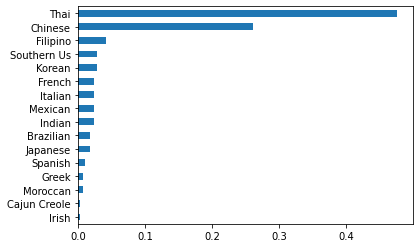

In [17]:
df['pred_label'] = df.prediction.replace({
    0: 'Brazilian',
    1: 'British',
    2: 'Cajun Creole',
    3: 'Chinese',
    4: 'Filipino',
    5: 'French',
    6: 'Greek',
    7: 'Indian',
    8: 'Irish',
    9: 'Italian',
    10: 'Jamaican',
    11: 'Japanese',
    12: 'Korean',
    13: 'Mexican',
    14: 'Moroccan',
    15: 'Russian',
    16: 'Southern Us',
    17: 'Spanish',
    18: 'Thai',
    19: 'Vietnamese'
})
    
vietnamese = (df[(df.cuisine_label == 19) & (df.prediction != 19)])
vietnamese['pred_label'].value_counts(ascending = True, normalize=True).plot(kind='barh')

### What cuisine is it the worst at classifying?

<AxesSubplot:ylabel='cuisine'>

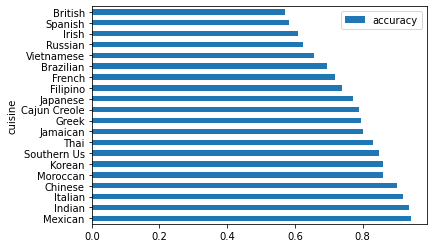

In [19]:
# Dividing the number of right predictions for each cuisine by the number of all predictions for each cuisine
worst = df[(df.cuisine_label == df.prediction)].cuisine.value_counts()/df.cuisine.value_counts()
pd.DataFrame(worst).to_csv('accuracy.csv')
df1 = pd.read_csv('accuracy.csv')
df1.rename(columns={'Unnamed: 0':'cuisine', 'cuisine':'accuracy'}, 
             inplace=True)

df1.sort_values(by = 'accuracy', ascending = False).plot.barh(x="cuisine")